# An Attempt to Predict Stock Market Prices

### **Data Description:** 

In this mission, we'll apply ARIMA on TCS stock market prices and LSTM on S&P500 time series data. 

**a) TCS**

The TCS dataset is taken from Official NSE website.
Timeline of Data recording : 1-1-2015 to 31-12-2015.
Shape of Dataset: 248 x 15

Column Descriptors:
Date: date on which data is recorded
Symbol: NSE symbol of the stock
Series: Series of that stock | EQ - Equity

**b) S&P 500**

The S&P500 dataset is stored in sphist.csv. Each row in the file contains a **daily record of the price of the S&P500 Index from 1950 to 2015**. 

The columns of the dataset are:

    Date -- The date of the record.
    Open -- The opening price of the day (when trading starts).
    High -- The highest trade price during the day.
    Low -- The lowest trade price during the day.
    Close -- The closing price for the day (when trading is finished).
    Volume -- The number of shares traded.
    Adj Close -- The daily closing price, adjusted for corporate actions.

**We'll be using both datasets to develop a predictive model. For S&P 500, we'll train the model with data from 1950-2012, and try to make predictions from 2013-2015. For TCS, we will have a train and test data split.**

In [1]:
import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

# Loading TCS Data

In [2]:
# Importing necessary modules
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Importing the statistics module
from statistics import mean
from statistics import median

# To load the input data
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot

# used to format headings 
bold = '\033[1m'
end = '\033[0m'

from google.colab import drive
drive.mount('/content/gdrive')

# Read the s&p 500 input data set and sorting based on date.
sp500 = pd.read_csv("gdrive/My Drive/tseries/IT/tcs_stock.csv", index_col=False)

sp500["Date"] = pd.to_datetime(sp500["Date"])
sp_sorted = sp500.sort_values("Date")

print(sp_sorted.head(3))
# print(sp_sorted.tail(3))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
        Date Symbol Series  ...  Trades  Deliverable Volume  %Deliverble
0 2015-01-01    TCS     EQ  ...    8002               52870       0.2883
1 2015-01-02    TCS     EQ  ...   27585              309350       0.6683
2 2015-01-05    TCS     EQ  ...   43234              456728       0.5207

[3 rows x 15 columns]


From the sorted data, we can see that data since Jan 2015 is there in the input dataset.

175


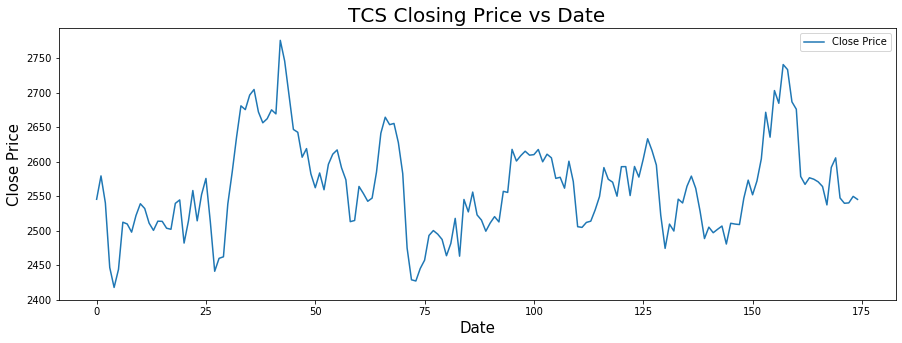

In [3]:
# Visualization Module

close = sp_sorted['Close'][:175]
x = np.arange(0, len(close))
print(len(close))

plt.figure(figsize=(15,5))
plt.plot(x, close, label="Close Price")

plt.legend()
plt.title("TCS Closing Price vs Date", fontsize=20)
plt.ylabel("Close Price", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.show()


To estimate the lag lets do a auto correlation plot.

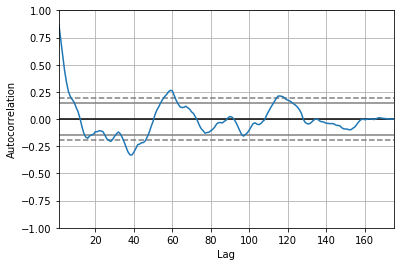

In [7]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

# close = np.real(filtered_sig)

autocorrelation_plot(close)
pyplot.show()

There is a positive correlation with the first 500 lags. Hence, a reasonable value for autocorrelation lag seems to be around 250.

35
Test MSE: 1180.102


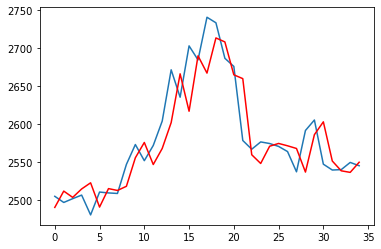

No handles with labels found to put in legend.


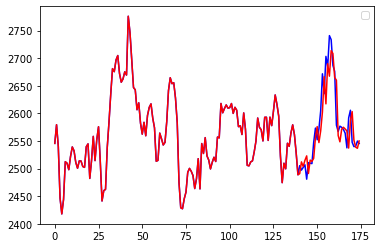

In [8]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
X = close.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
print(len(test))

warnings.filterwarnings("ignore")
for t in range(len(test)):
	model = ARIMA(history, order=(8,0,2))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

train_data = train.tolist()
for i in range(len(predictions)):
  train_data.append(predictions[i][0])


[array([2490.52443477]), array([2512.00045077]), array([2503.73096076]), array([2514.84799144]), array([2522.90792719]), array([2490.96424284]), array([2515.28287872]), array([2512.85108822]), array([2518.34118115]), array([2555.88546433]), array([2576.02410738]), array([2547.00633004]), array([2568.1362717]), array([2602.20041169]), array([2666.40301412]), array([2617.15184829]), array([2690.09856517]), array([2667.36067071]), array([2713.67018456]), array([2708.40329047]), array([2665.10806049]), array([2660.08378312]), array([2559.87111996]), array([2548.38416718]), array([2571.07099052]), array([2574.75120059]), array([2571.65635111]), array([2568.11913359]), array([2537.05134819]), array([2586.32255476]), array([2603.19728876]), array([2551.59514782]), array([2538.71540007]), array([2536.65679083]), array([2549.9948131])]


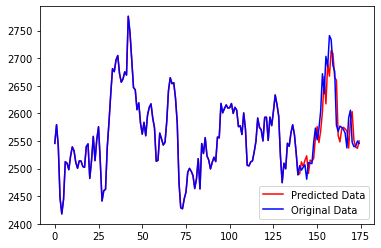

In [9]:
# Visualization with History + Prediction

print(predictions)
train_data = train.tolist()

for i in range(len(predictions)):
  train_data.append(predictions[i][0])
# print(train.tolist().append(predictions))
x_axis = np.arange(0, len(history))
pyplot.plot(train_data, color='red', label='Predicted Data')
pyplot.plot(close, color='blue', label='Original Data')
pyplot.legend()
pyplot.show()

# LSTM on S&P500 Time Series Data

In [12]:

# Read the s&p 500 input data set and sorting based on date.
sp500 = pd.read_csv("gdrive/My Drive/tseries/sphist.csv", index_col=False)

sp500["Date"] = pd.to_datetime(sp500["Date"])
sp_sorted = sp500.sort_values("Date")

print(sp_sorted.head(3))

            Date   Open   High    Low  Close     Volume  Adj Close
16589 1950-01-03  16.66  16.66  16.66  16.66  1260000.0      16.66
16588 1950-01-04  16.85  16.85  16.85  16.85  1890000.0      16.85
16587 1950-01-05  16.93  16.93  16.93  16.93  2550000.0      16.93


4590


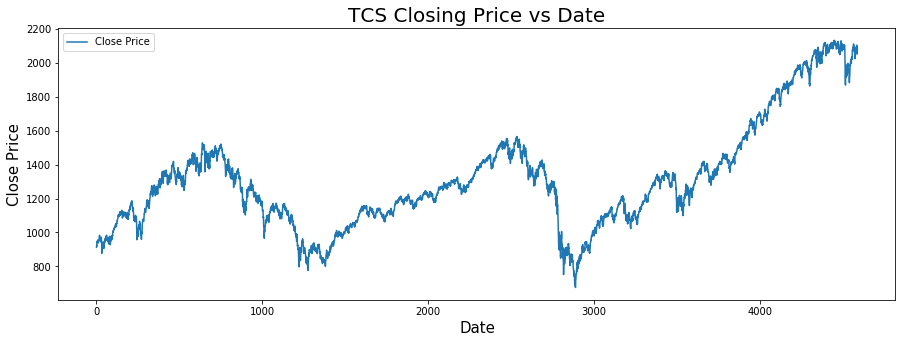

In [13]:
# Visualization Module

close = sp_sorted['Close'][12000:]
x = np.arange(0, len(close))
print(len(close))

plt.figure(figsize=(15,5))
plt.plot(x, close, label="Close Price")

plt.legend()
plt.title("TCS Closing Price vs Date", fontsize=20)
plt.ylabel("Close Price", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.show()


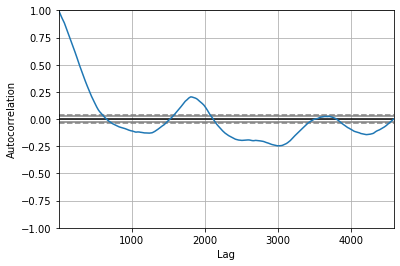

In [20]:
autocorrelation_plot(close)
pyplot.show()

From the above graph, we estimate the lag to be around 100.

[912.590027, 923.909973, 919.7700199999999, 945.6400150000001, 943.0, 947.2899779999999, 950.51001, 955.429993, 951.929993, 944.4799800000001, 937.909973, 945.2199710000001, 953.340027, 947.2800289999999, 955.409973, 960.4600220000001, 965.0300289999999, 972.6900019999999, 983.1199949999999, 973.840027, 970.6199949999999, 966.9799800000001, 968.099976, 970.2800289999999, 965.7199710000001, 955.25, 944.159973, 955.6099849999999, 972.2800289999999, 968.48999, 950.6900019999999, 941.6400150000001, 876.98999, 921.849976, 919.159973, 903.679993, 914.6199949999999, 938.98999, 940.76001, 942.76001, 938.0300289999999, 927.51001, 921.1300050000001, 923.7800289999999, 905.9600220000001, 916.659973, 928.349976, 946.2000119999999, 938.2299800000001, 944.590027, 958.9799800000001, 963.090027, 946.669983, 950.820007, 951.6400150000001, 955.400024, 974.7700199999999, 971.679993, 976.7700199999999, 973.099976, 983.7899779999999, 982.3699949999999, 975.7800289999999, 969.7899779999999, 954.940001999999

Using TensorFlow backend.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








model fitting over
2009.6586
1999.673
1996.5353
1995.6016
1995.3267
1995.2456
1995.1567
1995.0874
1995.1855
1994.8098
1994.9089
1994.4658
1992.6172
1991.1746
1990.6826
1990.5731
1990.5492
1990.5406
1990.538
1990.5374
1990.5369
1990.537
1990.537
1990.537
1990.537
1990.537
1990.537
1990.537
1990.5369
1990.537
1990.537
1990.5371
1990.5372
1990.5375
1990.5377
1990.5382
1990.5386
1990.5391
1990.539
1990.5388
1990.5388
1990.5385
1990.5391
1990.538
1990.5399
1990.5381
1990.5416
1990.5415
1990.5432
1990.5493
1990.5549
1990.5573
1990.5631
1990.5664
1990.574
1990.571
1990.5935
1990.575
1990.5574
1990.6094
1990.5636
1990.1365
1990.418
1990.0643
1990.7942
1988.3472
1987.8984
1986.3228
1985.6857
1985.4597
1985.4049
1985.3812
1985.3799
1985.3767
1985.3744
1985.3745
1985.3715
1985.3969
1985.3641
1985.385
1985.2742
1985.2903
1984.8201
1981.6353
1983.1556
1972.917
1971.3711
1969.58
1961.4019
1961.8921

No handles with labels found to put in legend.


1568.9185
Test MSE: 83339.615


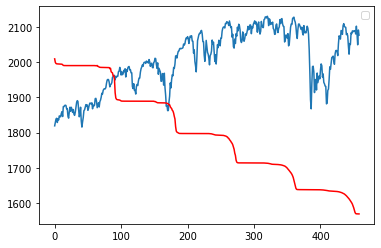

No handles with labels found to put in legend.


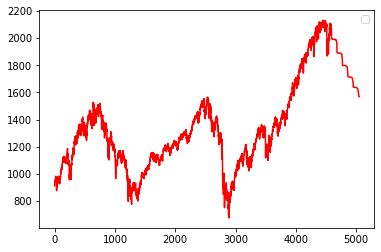

In [14]:
# univariate LSTM example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import warnings
from sklearn.metrics import mean_squared_error
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = list(close)
print(raw_seq)


size = int(len(raw_seq) * 0.9)
train, test = raw_seq[0:size], raw_seq[size:len(raw_seq)]
history = [x for x in train]
predictions = list()


# choose a number of time steps
n_steps = 100
print('before split sequence')
# split into samples
X, y = split_sequence(raw_seq, n_steps)

print('after split sequence')
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
print('model fitting over')

count = 0
warnings.filterwarnings("ignore")
# demonstrate prediction
for t in range(len(test)):
	x_input = array(raw_seq[-n_steps:])
	x_input = x_input.reshape((1, n_steps, n_features))
	yhat = model.predict(x_input, verbose=0)
	print(yhat[0][0])
	predictions.append(yhat[0][0])
 	# as we predict the difference
	raw_seq.append(yhat[0][0])


error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.legend()
pyplot.show()

x_axis = np.arange(0, len(raw_seq))
pyplot.plot(x_axis, raw_seq, color='red')
pyplot.legend()
pyplot.show()


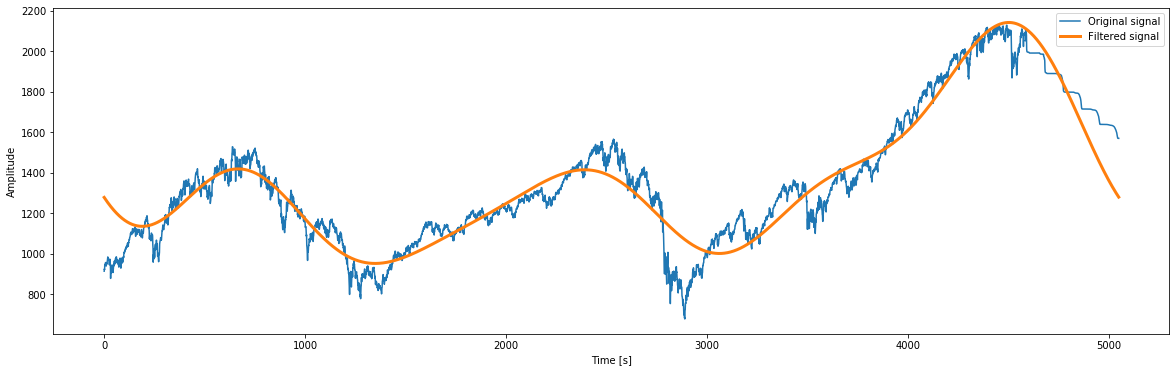

In [15]:
# Run this after prediction to find the significant signal movement.

# Execute this block to get the significant signal using fourier filtering.

from scipy import fftpack

time_step = 1
# period = 5.
sig = raw_seq

time_vec = np.arange(0, 5049, time_step)

# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(len(sig), d=time_step)


# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq*5] = 0
# high_freq_fft[np.abs(sample_freq) < peak_freq/4] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(20, 6))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

# Conclusion

The prediction makes sense as the curve hits an all time high around 4500. Hence, the price should come down going forward. The LSTM predicted trend is also the same. 
